In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15.0, 6.0]

In [24]:
co2_levels = pd.read_csv('../../Forecasting/co2.csv')
co2_levels.date = pd.to_datetime(co2_levels.date.apply(str))
co2_levels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     727 non-null    datetime64[ns]
 1   CO2_ppm  727 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.5 KB


In [25]:
# Set date column as index
co2_levels = co2_levels.set_index('date')
co2_levels.head(2)

,CO2_ppm
date,
1958-03-01,315.71
1958-04-01,317.45


In [26]:
# Print out the number of missing values
print(co2_levels.isnull().sum())

CO2_ppm    0
dtype: int64


In [27]:
# Impute missing values with the next valid observation
co2_levels = co2_levels.fillna(method='bfill')

# Print out the number of missing values
print(co2_levels.isna())

            CO2_ppm
date               
1958-03-01    False
1958-04-01    False
1958-05-01    False
1958-06-01    False
1958-07-01    False
...             ...
2018-05-01    False
2018-06-01    False
2018-07-01    False
2018-08-01    False
2018-09-01    False

[727 rows x 1 columns]


### Display rolling averages
- It is also possible to visualize rolling averages of the values in your time series. This is equivalent to "smoothing" our data, and can be particularly useful when our time series contains a lot of noise or outliers.
- The window parameter should be set according to the granularity of our time series. For example, if our time series contains daily data and we are looking for rolling values over a whole year, we should specify the parameter to window=365
-  In addition, it is easy to get rolling values for other other metrics, such as the standard deviation (.std()) or variance (.var()).

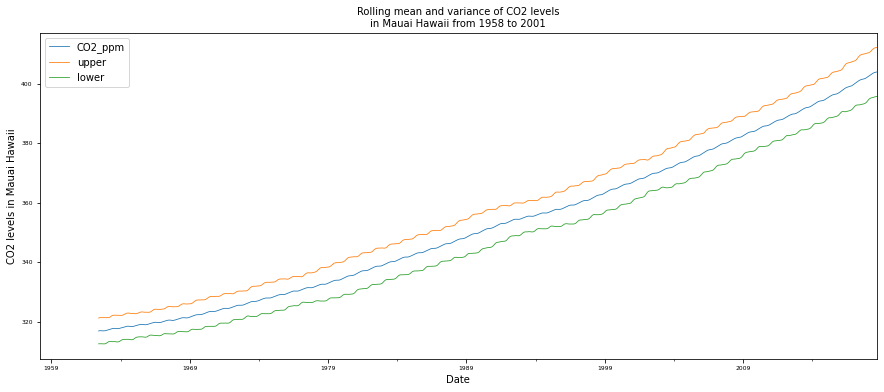

In [28]:
# Compute the 52 weeks rolling mean of the co2_levels DataFrame
ma = co2_levels.rolling(window=52).mean()

# Compute the 52 weeks rolling standard deviation of the co2_levels DataFrame
mstd = co2_levels.rolling(window=52).std()

# Add the upper bound column to the ma DataFrame
ma['upper'] = ma['CO2_ppm'] + (2 * mstd['CO2_ppm'])

# Add the lower bound column to the ma DataFrame
ma['lower'] = ma['CO2_ppm'] - (2 * mstd['CO2_ppm'])

# Plot the content of the ma DataFrame
ax = ma.plot(linewidth=0.8, fontsize=6)

# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('CO2 levels in Mauai Hawaii', fontsize=10)
ax.set_title('Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001', fontsize=10)
plt.show()

### Display aggregated values
- We may sometimes be required to display our data in a more aggregated form. For example, the `co2_levels` data contains weekly data, but we may need to display its values aggregated by month of year.


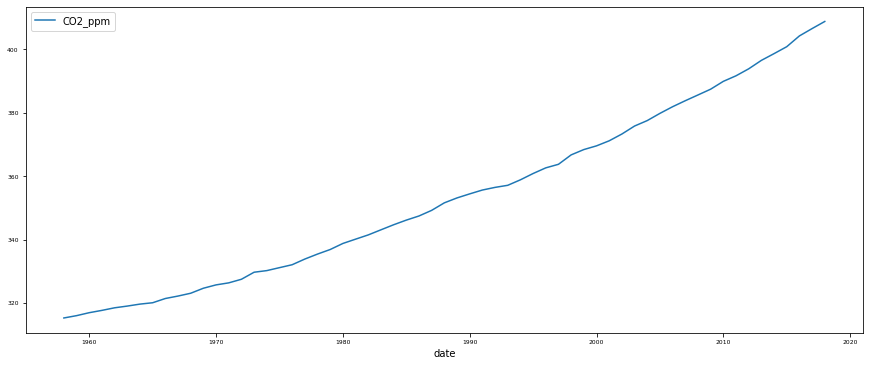

In [30]:
# Get month for each dates in the index of co2_levels
index_month = co2_levels.index.year
# co2_levels.index

# Compute the mean CO2 levels for each month of the year
mean_co2_levels_by_month = co2_levels.groupby(index_month).mean()

# Plot the mean CO2 levels for each month of the year
mean_co2_levels_by_month.plot(fontsize=6)

# Specify the fontsize on the legend
plt.legend(fontsize=10)

# Show plot
plt.show()

### Boxplots and Histograms
- Boxplots represent a graphical rendition of the minimum, median, quartiles, and maximum of our data. We can generate a boxplot by calling the `.boxplot()` method on a DataFrame.
- Another method to produce visual summaries is by leveraging histograms, which allow us to inspect the data and uncover its underlying distribution, as well as the presence of outliers and overall spread.


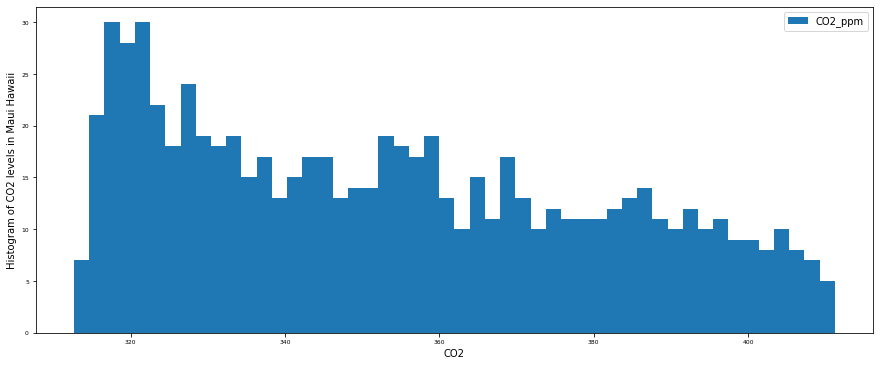

In [31]:
# Generate a histogram
ax = co2_levels.plot(kind='hist', bins=50, fontsize=6)

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Histogram of CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

No handles with labels found to put in legend.


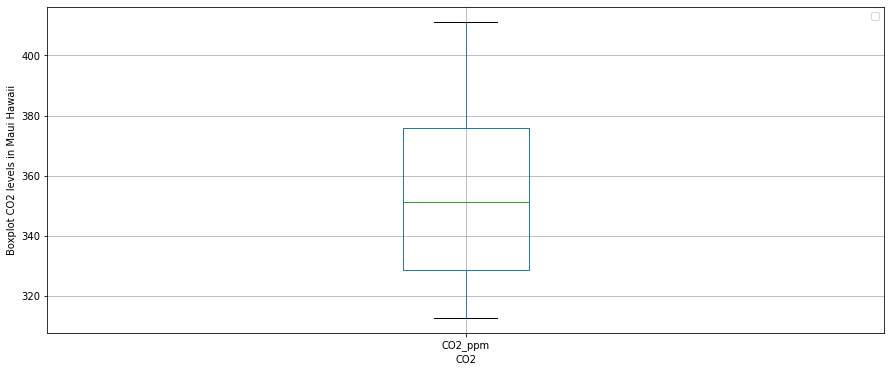

In [32]:
# Generate a boxplot
ax = co2_levels.boxplot()

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Boxplot CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

### Density plots
- histograms can be a substandard method for assessing the distribution of our data because they can be strongly affected by the number of bins that have been specified. Instead, kernel density plots represent a more effective way to view the distribution of our data. 

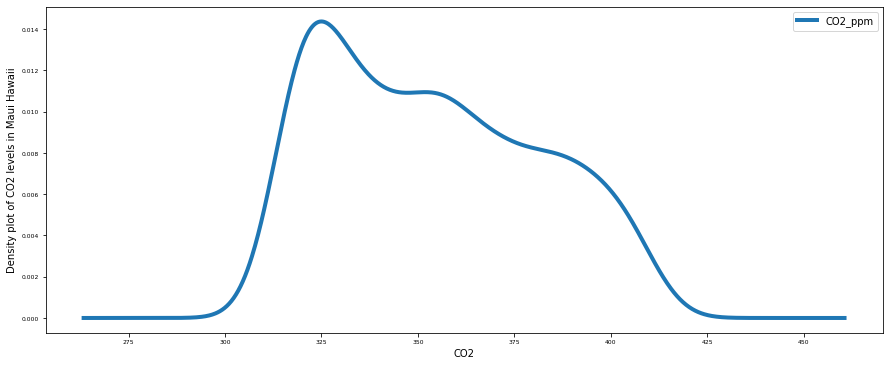

In [33]:
# Display density plot of CO2 levels values
ax = co2_levels.plot(kind='density', linewidth=4, fontsize=6)

# Annotate x-axis labels
ax.set_xlabel('CO2', fontsize=10)

# Annotate y-axis labels
ax.set_ylabel('Density plot of CO2 levels in Maui Hawaii', fontsize=10)

plt.show()